In [1]:
a = [5,4,6,2,1,1,5,2,5,9,7]
a

[5, 4, 6, 2, 1, 1, 5, 2, 5, 9, 7]

In [1]:
import numpy as np
import pandas as pd

In [3]:
a_ser = pd.Series(a)
a_ser

0     5
1     4
2     6
3     2
4     1
5     1
6     5
7     2
8     5
9     9
10    7
dtype: int64

In [4]:
#Вычисление статистик для серии или фрейма
a_ser.describe()

count    11.000000
mean      4.272727
std       2.572583
min       1.000000
25%       2.000000
50%       5.000000
75%       5.500000
max       9.000000
dtype: float64

In [37]:
# Определение максимального и минимального значения
mi = a_ser.min()
ma = a_ser.max()
print('min = '+ str(mi), 'max = ' + str(ma))

min = 1 max = 9


In [38]:
# Размах мах - мин
r = ma - mi
r

8

In [11]:
# Определение числового идентификатора(индекса), мин и мах значения
mi = a_ser.argmin()
ma = a_ser.argmax()
print('min = '+ str(mi), 'max = ' + str(ma))

min = 4 max = 9


In [12]:
# Определение идентификатора мин и мах значения
mi = a_ser.idxmin()
ma = a_ser.idxmax()
print('min = '+ str(mi), 'max = ' + str(ma))

min = 4 max = 9


In [23]:
# Вычисление суммы
s = a_ser.sum()
s

47

In [35]:
# Вычисление среднего
s = a_ser.mean()
round(s,2)

4.27

In [34]:
# Вычисление моды (значение, которое встречается в наборе данных чаще всего)
m = a_ser.mode()
m

0    5
dtype: int64

In [26]:
# Вычисление медианы, Медиа́на (от лат. mediāna «середина») 
# или серединное значение набора чисел — число, 
# которое находится в середине этого набора, если его упорядочить
m = a_ser.median()
m

5.0

In [43]:
# Вычисление дисперсии
# мера разброса значений случайной величины относительно её математического ожидания
v = a_ser.var()
round(v,2)

6.62

In [45]:
# Вычисление среднеквадратичного отклонения (Квадратный корень из дисперсии)
s = a_ser.std()
round(s,2)

2.57

In [47]:
# Определение выборочной квантили (четверти выборки)
q = a_ser.quantile()
q

5.0

In [50]:
# выбросы 
# умеренные удалены ниже первой  или выше третьей от 1,5 IQRб но не больше 3 IQR
# экстремальные ниже первой или выше третьей от 3 IQR
moderate = 1.5 * q
extrem = 3 * q
print('умеренный = '+ str(moderate), 'экстремальный = ' + str(extrem))

умеренный = 7.5 экстремальный = 15.0


In [2]:
data = {"Наименование курса":
        ['Первичная обработка данных', 
         "Хранение и обработка данных",
        "Элементы мат.статистики",
        "Машинное обучение"],
       "Количество студентов":
        [121, 4589, 112, 345]}

In [4]:
k = pd.DataFrame(data)
k

,Наименование курса,Количество студентов
0,Первичная обработка данных,121
1,Хранение и обработка данных,4589
2,Элементы матстатистики,112
3,Машинное обучение,345


In [17]:
k_ln = k.iloc[:,1:2 ]
k_ln = np.log(k_ln)
k_ln

,Количество студентов
0,4.795791
1,8.431417
2,4.718499
3,5.843544


In [67]:
# Создаем подписи для оси Х
x_name = list(k.iloc[:,0])
x = list(range(len(x_name)))
x

[0, 1, 2, 3]

In [37]:
height_data = list(round(k_ln.iloc[:,0],2))
height_data

[4.8, 8.43, 4.72, 5.84]

([<matplotlib.axis.XTick at 0x7fcc08a696d0>,
 [Text(0, 0, 'Первичная обработка данных'),
  Text(1, 0, 'Хранение и обработка данных'),
  Text(2, 0, 'Элементы матстатистики'),
  Text(3, 0, 'Машинное обучение')])

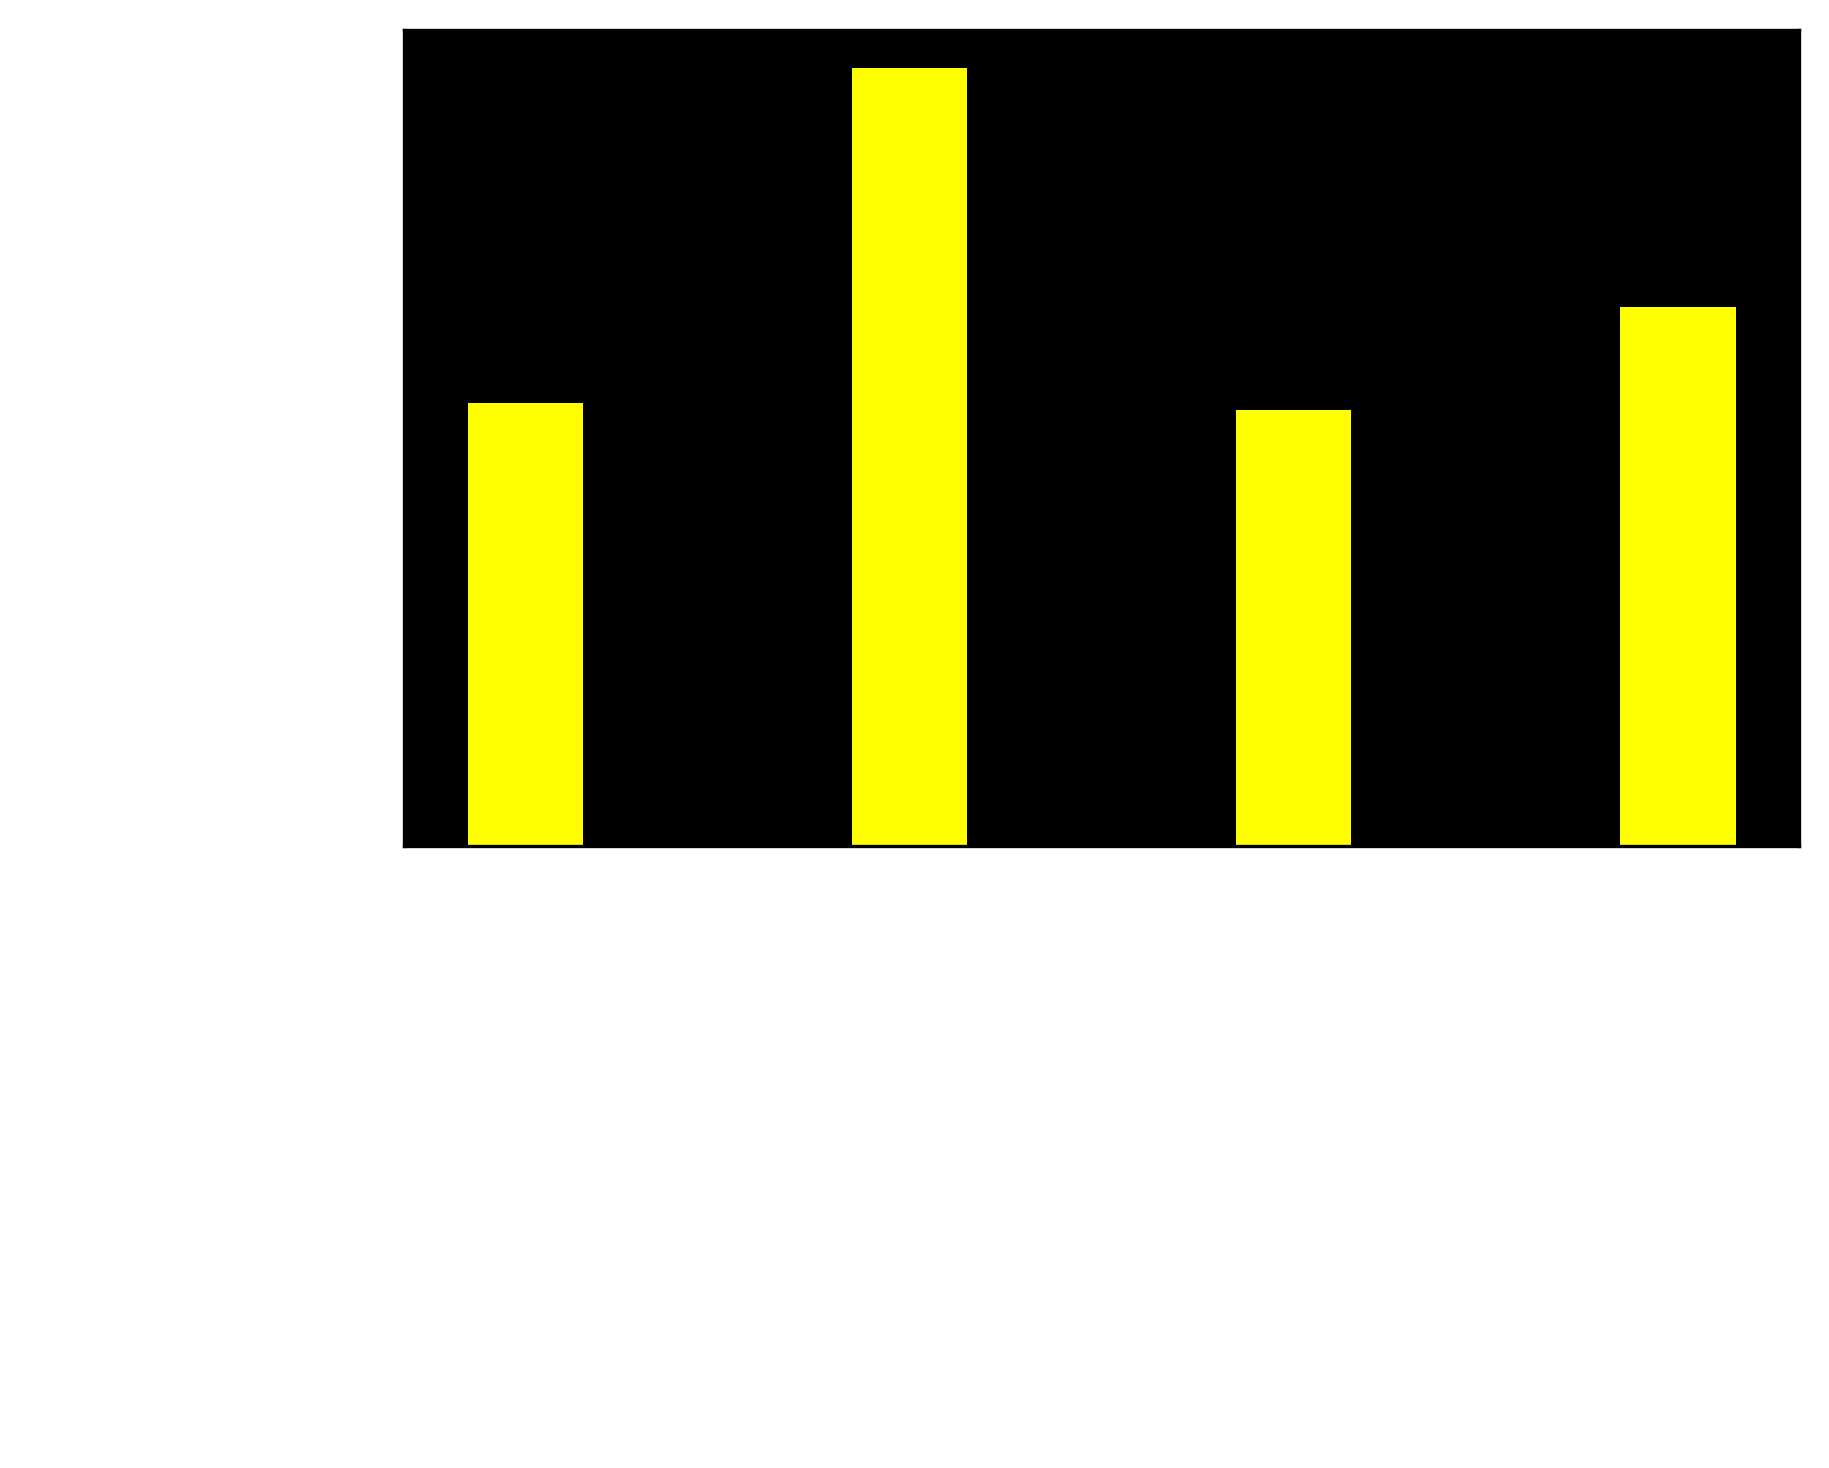

In [74]:
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline  
#import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300

# цвета графика
plt.rcParams['axes.facecolor'] = 'black'
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# поворот подписи на 45 градусов
fig,ax = plt.subplots()
fig.autofmt_xdate(rotation=45)

# рисуем график
plt.bar(x, height_data, color='yellow',  width=0.3)
plt.xlabel("Подпись под X")
plt.ylabel("Подпись слева Y")

# маппинг чисел и подписей
plt.xticks(x, x_name)

# plt.show()

In [75]:
# Н о р м а л и з а ц и я    д а н н ы х
# Униполярная (0...1) Линейная = (X-Xmin)/(Xmax-Xmin)
# Униполярная (0...1) Экспоненциальная = (1 - exp(1-X/Xmin))
# Биполярная (-1...1) = (2X - (Xmax + Xmin)) / (Xmax - Xmin)

In [85]:
import numpy as np
import pandas as pd

In [86]:
data = [6,9,5,17,9]
data = pd.DataFrame({'name':data})

In [87]:
data

,name
0,6
1,9
2,5
3,17
4,9


In [88]:
x_min = data.min()
x_max = data.max()

In [92]:
# Униполярная Линейная = (X-Xmin)/(Xmax-Xmin)
data_lin = (data -  x_min)/(x_max-x_min)
round(data_lin,2)

,name
0,0.08
1,0.33
2,0.00
3,1.00
4,0.33


In [93]:
# Униполярная Экспоненциальная = (1 - exp(1-X/Xmin))
data_exp = (1 -  np.exp(1 - (data/x_min)))
round(data_exp,2)

,name
0,0.18
1,0.55
2,0.00
3,0.91
4,0.55


In [91]:
x = (1 -  np.exp(1 - (17/x_min)))
x

name    0.909282
dtype: float64

In [31]:
flats = pd.read_csv('flats.csv', index_col = 'ID')
flats

,DISTANCE,STOP_COUNT,COST
ID,,,
1,24,3,13.72
2,25,11,26.38
3,27,12,13.42
4,25,7,21.43
5,4,4,13.54
...,...,...,...
196,6,9,16.35
197,13,3,26.79
198,6,7,15.70


In [32]:
x_min = flats.min()
x_max = flats.max()

In [33]:
flats_exp = (1 -  np.exp(1 - (flats/x_min)))
#round(flats_exp,2)

In [34]:
fx = flats_exp["DISTANCE"]+flats_exp['STOP_COUNT']+flats_exp["COST"]
fx_sorted = pd.DataFrame(fx)
fx.sort_values(ascending=True)


ID
103    0.392867
161    0.668177
169    1.022971
131    1.063133
69     1.084012
         ...   
46     2.847456
15     2.847626
43     2.852257
141    2.855176
185    2.855328
Length: 200, dtype: float64